In [68]:
## Uge 10 - Opgave 1
# Brug regression til at finde pawpularity-scoren for alle kæledyrene
# og test med forskellige inputs, om modellen regner rigtigt.

## notebook_3 er andet tredje på at lave regression på pawpularity-scoren, med nye inputs

import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np


train_data = pd.read_csv("./data/train/train.csv")
test_data = pd.read_csv("./data/test/test.csv")
sample_submission = pd.read_csv("./data/test/sample_submission.csv")

# print(train_data.head())

In [70]:
# Opgave 4 Cross validation
# model comparrison (5 folds - is testet 5 times)

# Prepare the data
X = train_data.drop(['Id', 'Pawpularity'], axis=1)
y = train_data['Pawpularity']
X_test = test_data.drop(['Id'], axis=1)
X_test2 = test_data.drop(['Id'], axis=1)

# Create a Linear Regression model
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVM', SVC())
]

# Define a K-Fold cross-validation splitter
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define multiple scoring metrics
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

# Iterate over models and perform cross-validation
for name, model in models:
    results = cross_validate(model, X, y, cv=cv, scoring=scoring)
    # Print the results
    print(f"\n{name} R^2 scores:", results['test_r2'])
    print(f"\n{name} Mean Squared Error scores:", results['test_neg_mean_squared_error'])
    print(f"\n{name} Mean Absolute Error scores:", results['test_neg_mean_absolute_error'])



Logistic Regression R^2 scores: [-0.26816859 -1.0342961  -0.29369719 -0.19819155 -0.2309379 ]

Logistic Regression Mean Squared Error scores: [-560.57589511 -859.03378719 -522.31079717 -507.01261352 -527.29717457]

Logistic Regression Mean Absolute Error scores: [-16.18255169 -19.93847705 -15.64883956 -15.27598385 -15.70181635]

Linear Regression R^2 scores: [ 0.002148   -0.00329095 -0.00419659  0.00086155  0.00135547]

Linear Regression Mean Squared Error scores: [-441.08628798 -423.66537496 -405.4292811  -422.78365237 -427.78960412]

Linear Regression Mean Absolute Error scores: [-15.69692345 -15.49739332 -15.22761056 -15.37058238 -15.32535215]

Random Forest R^2 scores: [-0.58809418 -0.78432616 -0.92535588 -0.43615007 -0.55745764]

Random Forest Mean Squared Error scores: [-701.99445285 -753.47755925 -777.33350151 -607.70433905 -667.16851665]

Random Forest Mean Absolute Error scores: [-18.03681291 -18.93393848 -18.93895055 -16.78809284 -17.76286579]

SVM R^2 scores: [-0.21975987 -

In [60]:

# Prepare the data
X = train_data.drop(['Id', 'Pawpularity', 'Human', 'Action', 'Near', 'Collage', 'Eyes', 'Face', 'Info', 'Subject Focus'], axis=1)
y = train_data['Pawpularity']
X_test = test_data.drop(['Id', 'Human', 'Action', 'Near', 'Collage', 'Eyes', 'Face', 'Info', 'Subject Focus'], axis=1)
X_test2 = test_data.drop(['Id', 'Human', 'Action', 'Near', 'Collage', 'Eyes', 'Face', 'Info', 'Subject Focus'], axis=1)

# Create a Linear Regression model
model = LogisticRegression()

# Define multiple scoring metrics
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

# Perform cross-validation
results = cross_validate(model, X, y, scoring=scoring, cv=5)

# Display the results
print("R^2 scores:", results['test_r2'])
print("\nMean Squared Error scores:", results['test_neg_mean_squared_error'])
print("\nMean Absolute Error scores:", results['test_neg_mean_absolute_error'])

# # Opgave 4 Cross-validation
# # Split the data into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # Fit the model with the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# train_predictions = model.predict(X_test)

# test_predictions = model.predict(X_test2)

# # print(train_predictions)
# print("\nTest predictions: ", test_predictions)

/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


R^2 scores: [-0.285735   -0.54076573 -0.20451402 -0.20437358 -0.22292416]

Mean Squared Error scores: [-546.401412   -653.68482098 -512.00302725 -511.5110999  -514.75227043]

Mean Absolute Error scores: [-15.99193142 -17.26727181 -15.55297679 -15.6160444  -15.52522704]


/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

Pawpularity      1.000000
Accessory        0.018820
Group            0.017735
Face             0.012982
Human            0.000895
Occlusion       -0.000956
Eyes            -0.001976
Subject Focus   -0.006873
Blur            -0.020890
Name: Pawpularity, dtype: float64


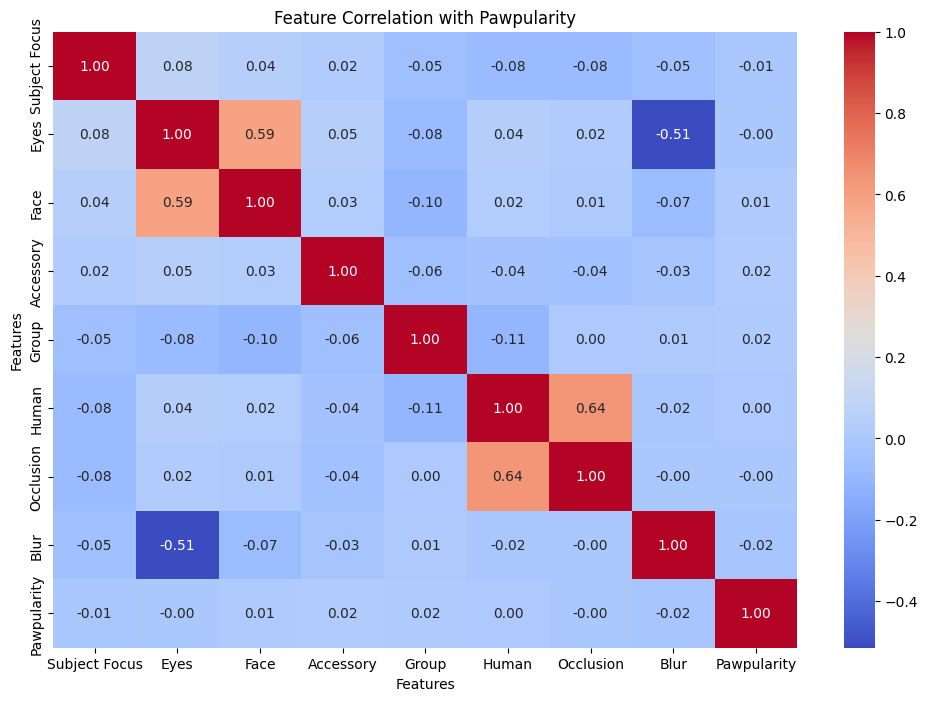

In [49]:
# heatmap
train_data_for_corr = X_train.copy()
train_data_for_corr['Pawpularity'] = y_train

correlation_matrix = train_data_for_corr.corr()

pawpularity_correlation = correlation_matrix['Pawpularity'].sort_values(ascending=False)
print(pawpularity_correlation)

correlation_matrix = train_data_for_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation with Pawpularity')
plt.xlabel('Features')
plt.ylabel('Features')


plt.show()


In [51]:
# Create a DataFrame with the Id from the test data and the predictions
final_df = pd.DataFrame({
    'Id': test_data['Id'],
    'Pawpularity': test_predictions
})

# Write the DataFrame to a CSV file
final_df.to_csv('./data/test/test3_results.csv', index=False)